#Sentiment Analysis using DistilBERT

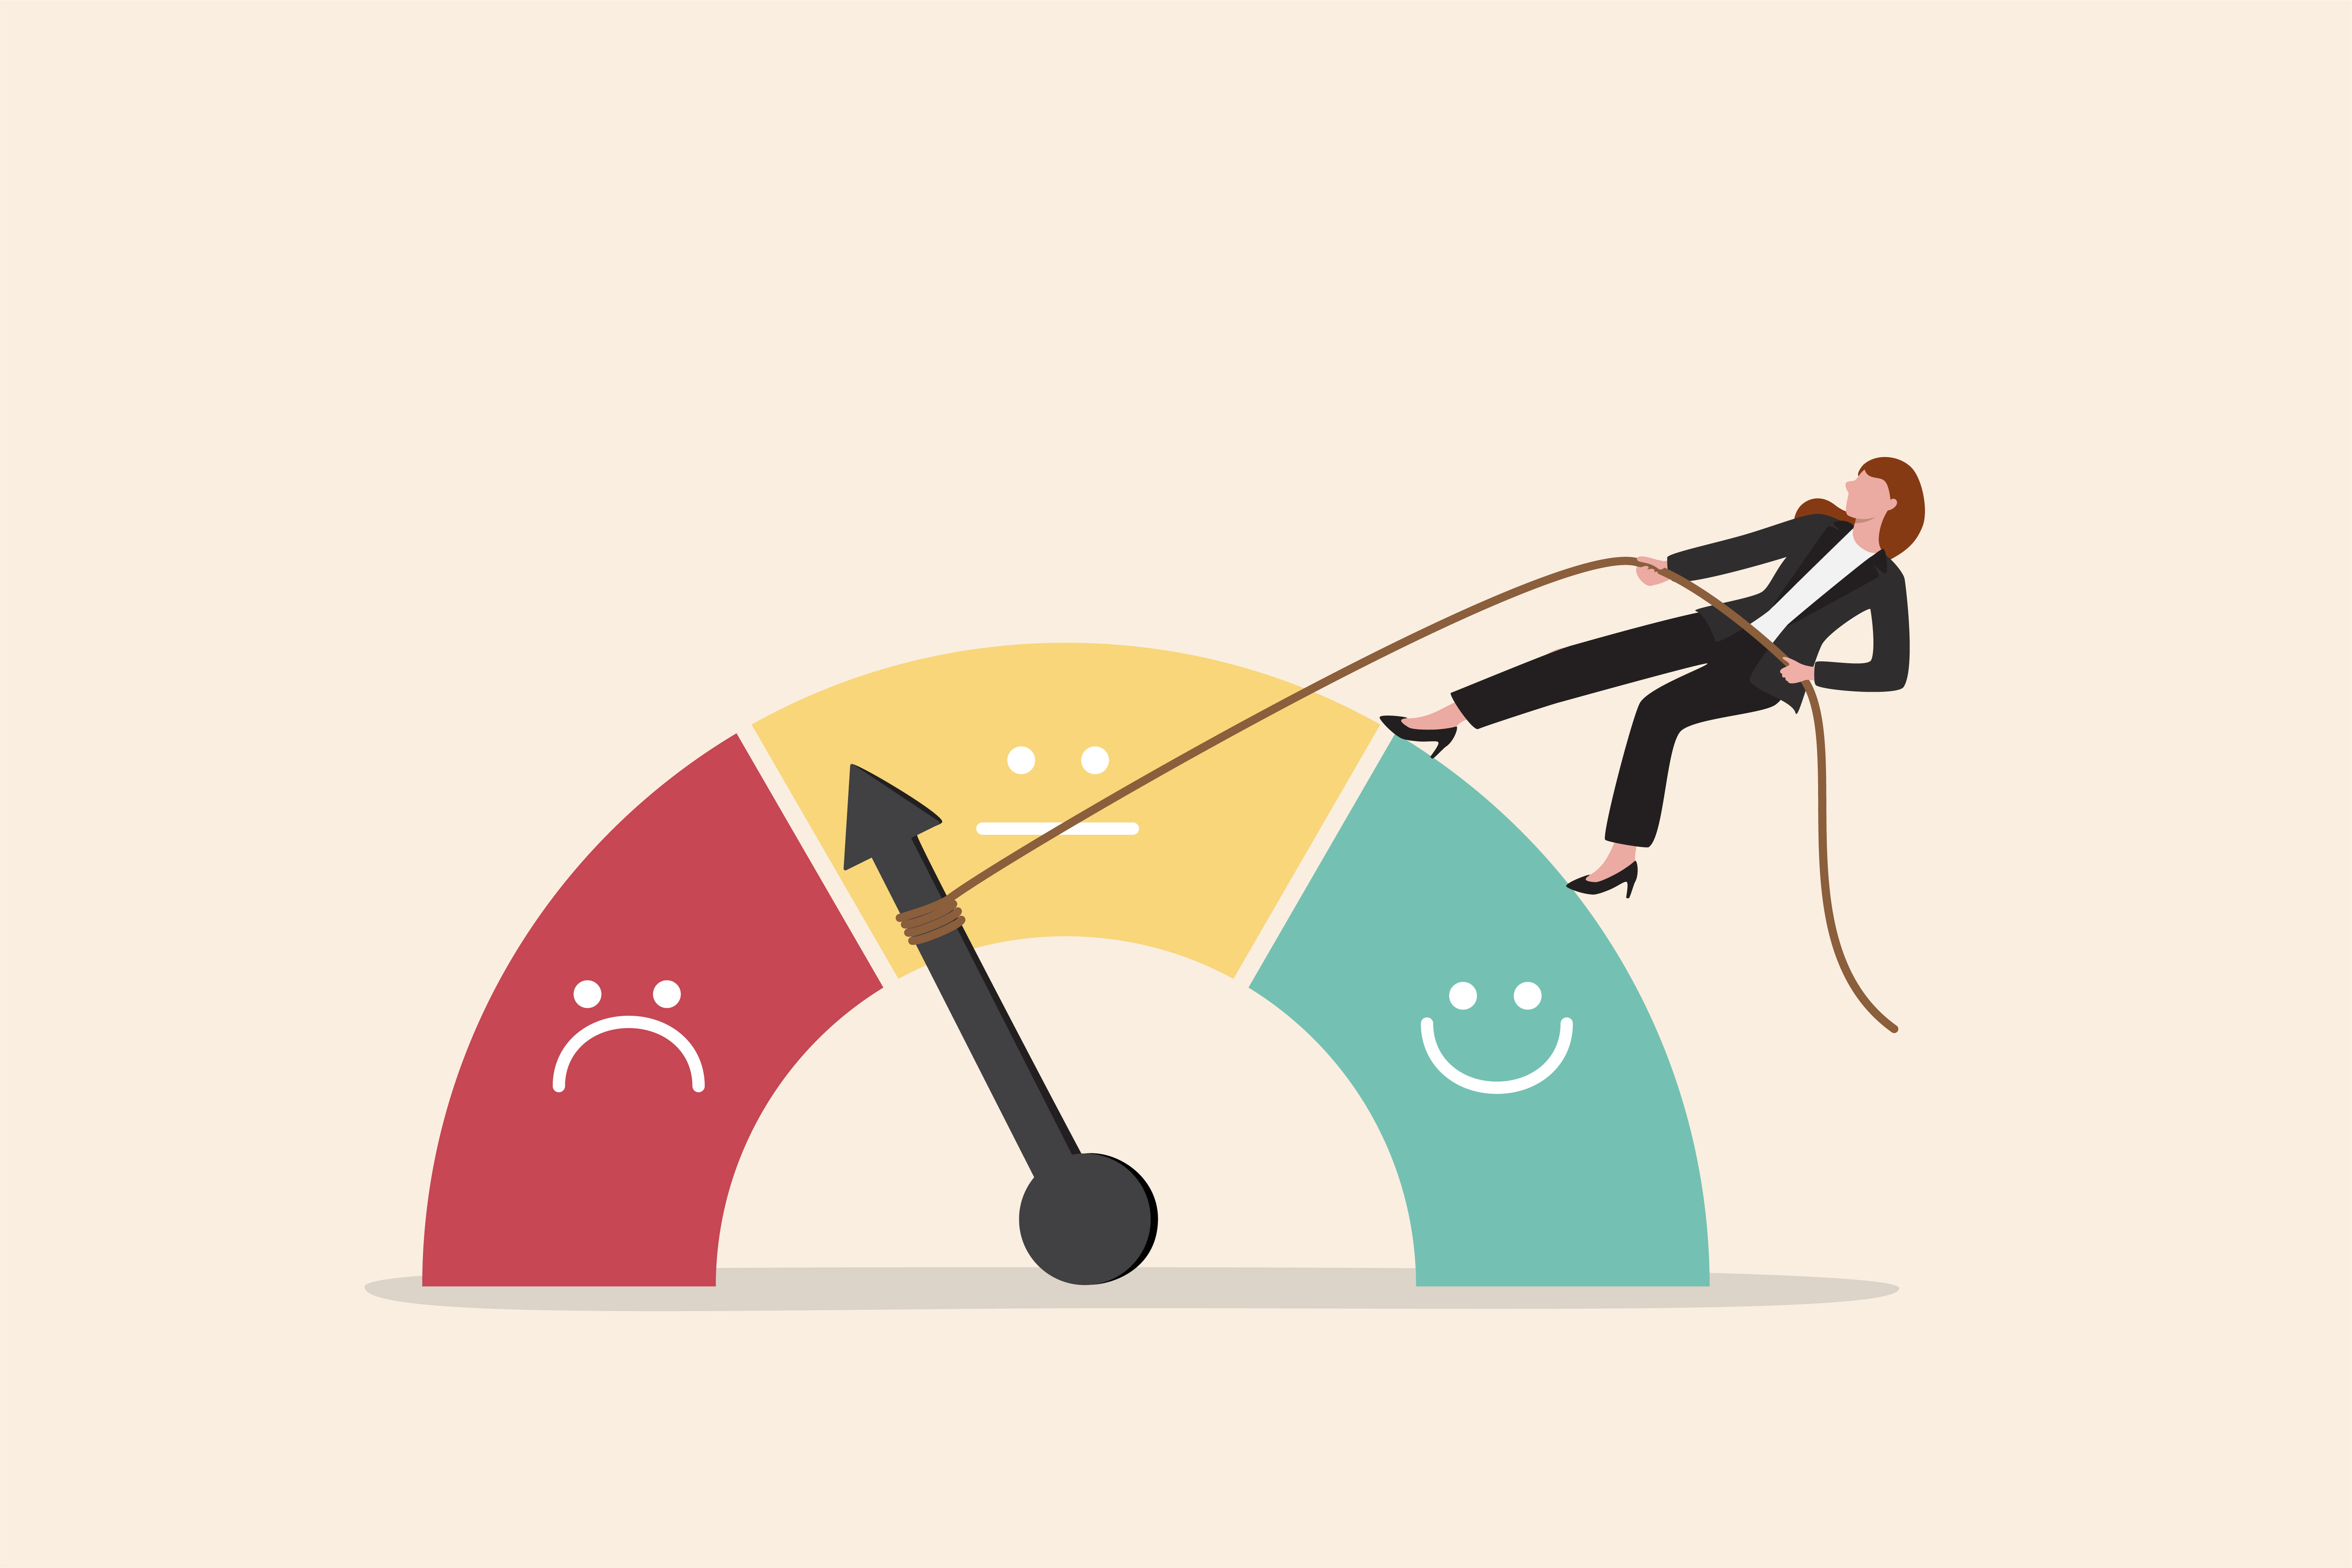

To import the DistilBERT model in Python, you can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT. First, you need to install the library:

For this, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [2]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("/content/ch4_feedback_data.csv", header=None)

In [3]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8 non-null      object
 1   1       5 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes


#Exercise #1: Load Pre-Trained DistilBERT model and Tokenizer

In [5]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

#Exercise #2: Load DistilBERT Sentiment Analysis Pipeline

In [6]:
# SOLUTION


#This method assigned a STAR rating automatically.
#So, we take unlabeled data, perform sentiment analysis using DistilBERT and it gives a score!""

# Load DistilBERT sentiment analysis pipeline
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first (and only) column in each row
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})


# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print()  # Add a blank line for readability

# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


Text: Your products are excellent. I really love the quality! However
Sentiment Score: 0.5744263529777527
Sentiment Label: 5 stars

Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Score: 0.5543172359466553
Sentiment Label: 4 stars

Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Score: 0.8357024192810059
Sentiment Label: 5 stars

Text: The product didn't meet my expectations
Sentiment Score: 0.4780276417732239
Sentiment Label: 2 stars

Text: Your products are not good. I really don't like the quality! However
Sentiment Score: 0.5138060450553894
Sentiment Label: 2 stars

Text: The customer service team in San Francisco was not helpful in resolving my issue. But
Sentiment Score: 0.5047703385353088
Sentiment Label: 3 stars

Text: The new features in the latest release are not fantastic! They have not greatly improved t

#Exercise #3 (Optional): Exploratory Data Analysis

In [7]:
sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.574426,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835702,5 stars
3,The product didn't meet my expectations,0.478028,2 stars
4,Your products are not good. I really don't lik...,0.513806,2 stars


Word Cloud

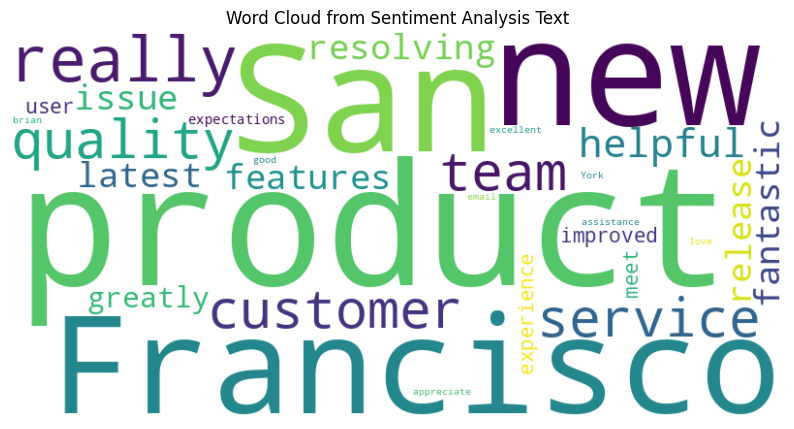

In [8]:
from wordcloud import WordCloud


# Assuming you have already performed sentiment analysis and have sentiment_df_bert DataFrame

# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['Text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()


Pie Chart

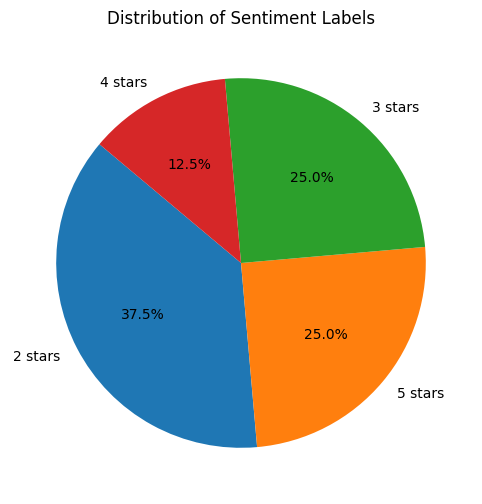

In [9]:
# Count the occurrences of each sentiment label
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()



Bar Chart

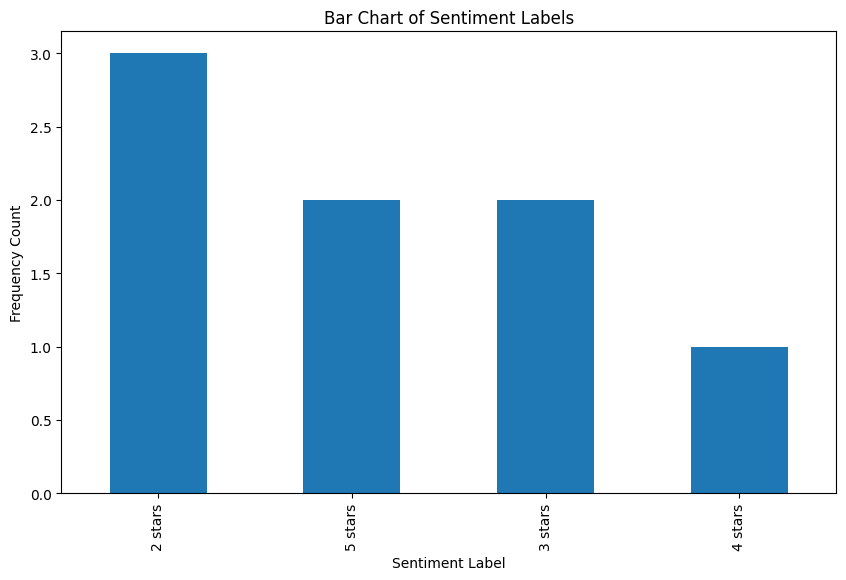

In [10]:
# Count the occurrences of each sentiment label for visualization
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()
